# Beispiel 1: Abrufen grundlegender Bestandsinformationen

In diesem Beispiel verwenden wir die yfinance-Bibliothek, um grundlegende Aktieninformationen für eine Liste von Symbolen abzurufen und zu drucken. Das Skript ruft den Namen, den Markt und den Sektor der Aktie ab und behandelt fehlende Daten ordnungsgemäß mit den Standardwerten "N/A".

In [1]:
import yfinance as yf
symbols = ['MSFT', 'GOOGL', 'AMZN', 'TSLA']
for symbol in symbols:
    stock = yf.Ticker(symbol)
    info = stock.info
    print(f"Symbol: {symbol}")
    print(f"Name: {info.get('shortName', 'N/A')}")
    print(f"Market: {info.get('market', 'N/A')}")
    print(f"Sector: {info.get('sector', 'N/A')}")
    print("-" * 30)


Symbol: MSFT
Name: Microsoft Corporation
Market: N/A
Sector: Technology
------------------------------
Symbol: GOOGL
Name: Alphabet Inc.
Market: N/A
Sector: Communication Services
------------------------------
Symbol: AMZN
Name: Amazon.com, Inc.
Market: N/A
Sector: Consumer Cyclical
------------------------------
Symbol: TSLA
Name: Tesla, Inc.
Market: N/A
Sector: Consumer Cyclical
------------------------------


# Beispiel 2: Abrufen historischer Aktiendaten

In diesem Beispiel verwenden wir die yfinance-Bibliothek, um historische Aktiendaten für Amazon (AMZN) über das Jahr 2022 abzurufen. Das Skript ruft diese Daten ab und formatiert sie für die Anzeige in der Tabellenbibliothek. Es zeigt nur die ersten und letzten 5 Datenzeilen an und bietet eine klare Momentaufnahme der Wertentwicklung der Aktie über den angegebenen Zeitraum.

In [2]:
import yfinance as yf
import pandas as pd
from tabulate import tabulate

symbol = 'AMZN'
start_date = '2022-01-01'
end_date = '2022-12-31'

stock = yf.Ticker(symbol)
historical_data = stock.history(start=start_date, end=end_date)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print(f"Historical Data for {symbol} from {start_date} to {end_date}")

formatted_data = pd.concat([historical_data.head(), historical_data.tail()])
print(tabulate(formatted_data, headers='keys', tablefmt='psql'))

print("\nShowing only the first and last 5 rows of data:")
print(tabulate(formatted_data, headers='keys', tablefmt='grid'))


Historical Data for AMZN from 2022-01-01 to 2022-12-31
+---------------------------+---------+---------+---------+---------+-------------+-------------+----------------+
| Date                      |    Open |    High |     Low |   Close |      Volume |   Dividends |   Stock Splits |
|---------------------------+---------+---------+---------+---------+-------------+-------------+----------------|
| 2022-01-03 00:00:00-05:00 | 167.55  | 170.704 | 166.161 | 170.404 | 6.352e+07   |           0 |              0 |
| 2022-01-04 00:00:00-05:00 | 170.438 | 171.4   | 166.35  | 167.522 | 7.0726e+07  |           0 |              0 |
| 2022-01-05 00:00:00-05:00 | 166.883 | 167.126 | 164.357 | 164.357 | 6.4302e+07  |           0 |              0 |
| 2022-01-06 00:00:00-05:00 | 163.451 | 164.8   | 161.937 | 163.254 | 5.1958e+07  |           0 |              0 |
| 2022-01-07 00:00:00-05:00 | 163.839 | 165.243 | 162.031 | 162.554 | 4.6606e+07  |           0 |              0 |
| 2022-12-23 00:00:00-05:

# Beispiel 3: Abrufen von Aktiendaten mit benutzerdefinierten Intervallen

In diesem Beispiel verwenden wir die yfinance-Bibliothek, um Intraday-Aktiendaten für Tesla (TSLA) mit einem benutzerdefinierten Intervall von 1 Stunde für den letzten Tag abzurufen. Das Skript ruft detaillierte stündliche Kursdaten ab und zeigt sie an und bietet einen detaillierten Überblick über die Aktienbewegungen von Tesla innerhalb des angegebenen Zeitraums.

In [3]:
import yfinance as yf
symbol = 'TSLA'
interval = '1h'
stock = yf.Ticker(symbol)
intraday_data = stock.history(period='1d', interval=interval)

print(f"Intraday Data for {symbol} (Interval: {interval})")
print(intraday_data)


Intraday Data for TSLA (Interval: 1h)
                                 Open        High         Low       Close  \
Datetime                                                                    
2025-01-29 09:30:00-05:00  395.190002  398.589905  391.051697  392.040009   
2025-01-29 10:30:00-05:00  392.059998  393.700012  389.410004  389.765015   
2025-01-29 11:30:00-05:00  389.663910  390.899994  387.734894  390.255005   
2025-01-29 12:30:00-05:00  390.274994  391.510010  384.720001  389.998993   
2025-01-29 13:30:00-05:00  389.970001  390.559998  386.720001  387.758789   

                             Volume  Dividends  Stock Splits  
Datetime                                                      
2025-01-29 09:30:00-05:00  11559216        0.0           0.0  
2025-01-29 10:30:00-05:00   5957156        0.0           0.0  
2025-01-29 11:30:00-05:00   4995242        0.0           0.0  
2025-01-29 12:30:00-05:00   5691640        0.0           0.0  
2025-01-29 13:30:00-05:00   2209919        0

# Beispiel 4: Durchführen von Berechnungen für Daten

In diesem Beispiel wird der gleitende 20-Tage-Durchschnitt und die tägliche prozentuale Rendite für eine bestimmte Aktie berechnet. Anschließend werden die Daten in einem tabellarischen Format angezeigt und die Schlusskurse zusammen mit dem gleitenden Durchschnitt dargestellt, um Trends zu visualisieren.

Data with Moving Average and Daily Returns:
                                Close  20_Day_MA  Daily_Return
Date                                                          
2023-01-03 00:00:00-05:00  123.768456        NaN           NaN
2023-01-04 00:00:00-05:00  125.045029        NaN      1.031420
2023-01-05 00:00:00-05:00  123.718979        NaN     -1.060458
2023-01-06 00:00:00-05:00  128.271118        NaN      3.679419
2023-01-09 00:00:00-05:00  128.795593        NaN      0.408880


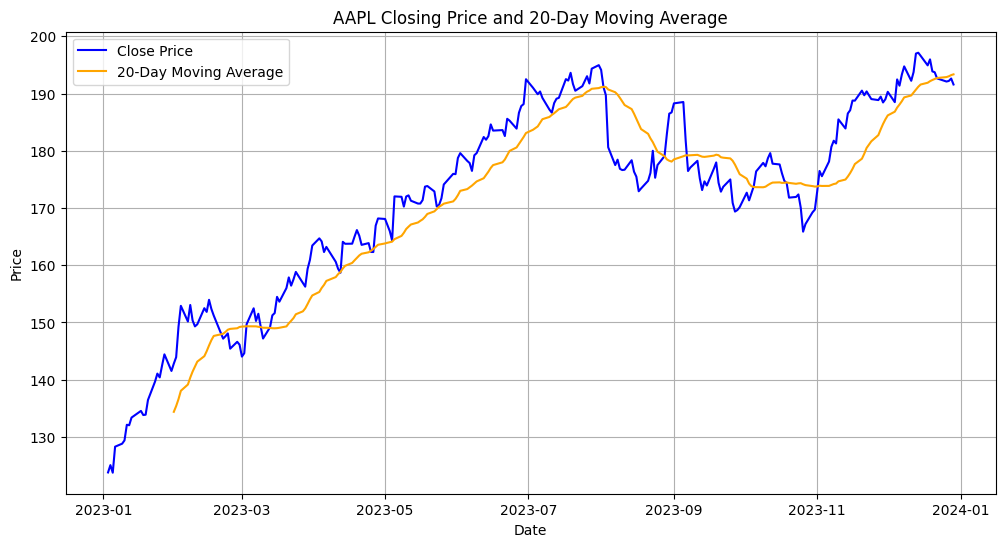

In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

symbol = 'AAPL'
start_date = '2023-01-01'
end_date = '2023-12-31'

stock = yf.Ticker(symbol)
data = stock.history(start=start_date, end=end_date)

data['20_Day_MA'] = data['Close'].rolling(window=20).mean()

data['Daily_Return'] = data['Close'].pct_change() * 100

print("Data with Moving Average and Daily Returns:")
print(data[['Close', '20_Day_MA', 'Daily_Return']].head())

plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['20_Day_MA'], label='20-Day Moving Average', color='orange')
plt.title(f'{symbol} Closing Price and 20-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


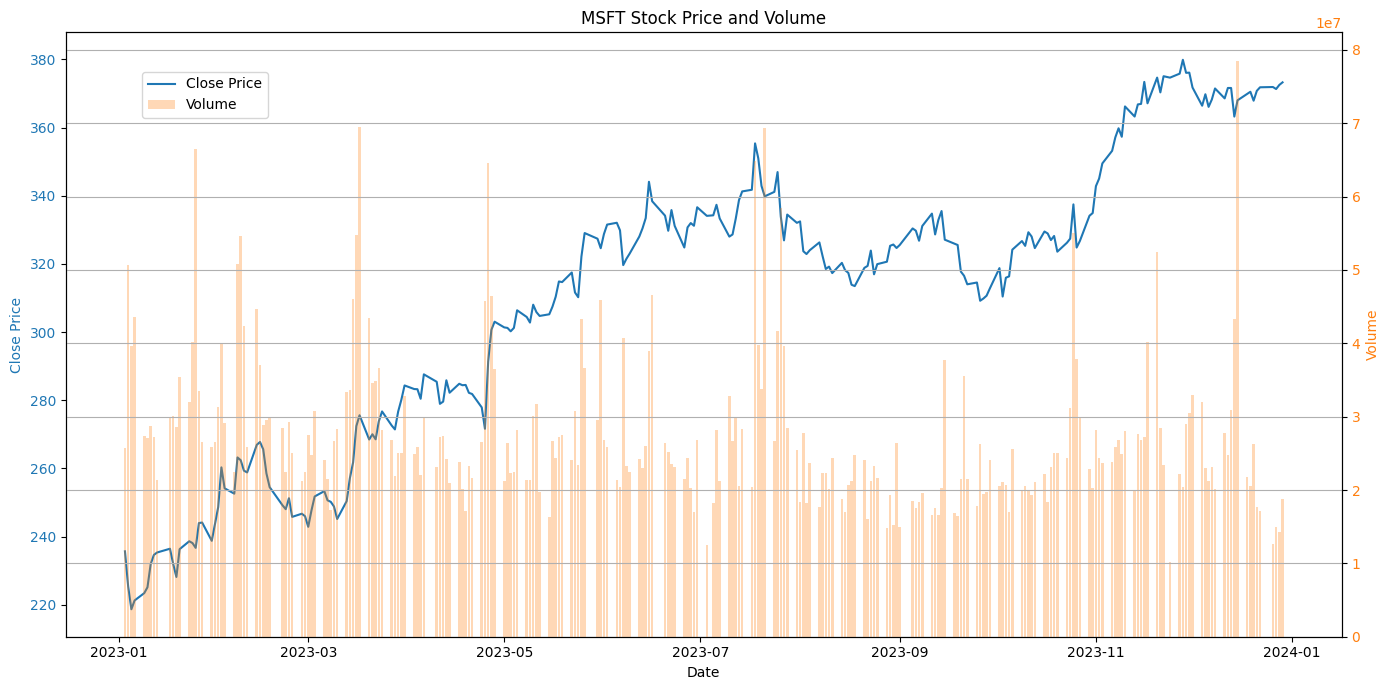

In [5]:
import yfinance as yf
import matplotlib.pyplot as plt

symbol = 'MSFT'
start_date = '2023-01-01'
end_date = '2023-12-31'

stock = yf.Ticker(symbol)
data = stock.history(start=start_date, end=end_date)

fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.set_xlabel('Date')
ax1.set_ylabel('Close Price', color='tab:blue')
ax1.plot(data.index, data['Close'], color='tab:blue', label='Close Price')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Volume', color='tab:orange')
ax2.bar(data.index, data['Volume'], color='tab:orange', alpha=0.3, label='Volume')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title(f'{symbol} Stock Price and Volume')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
plt.grid(True)
plt.show()
